## Problem statement

Given the available data, prepare models that predict whether someone should be a give a loan or not taking into account this individual details.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Input data

In [2]:
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


## Exploratory data analysis

In [4]:
# Describe numerical data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# Changing type of credit history to object 
df['Credit_History']=df['Credit_History'].astype('O')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null object
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 62.5+ KB


In [9]:
# Describe categorical data
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,564.0,614,614
unique,614,2,2,4,2,2,2.0,3,2
top,LP001507,Male,Yes,0,Graduate,No,1.0,Semiurban,Y
freq,1,489,398,345,480,500,475.0,233,422


In [10]:
# dropping loan_id as it drives no value
df.drop('Loan_ID',axis=1,inplace=True)

In [11]:
#check if any duplicate values
df.duplicated().any()

False

## Relationship between loan status and other variables

In [12]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Categorical data columns

In [13]:
categorical_data = df.select_dtypes(exclude=[np.number])
cat_cols = categorical_data.columns
cat_cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### Numerical data columns

In [14]:
numeric_data = df.select_dtypes(include=[np.number])
num_cols = numeric_data.columns
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

### Cat cols vs Target variable
We will be using box to compare category data with target variable 

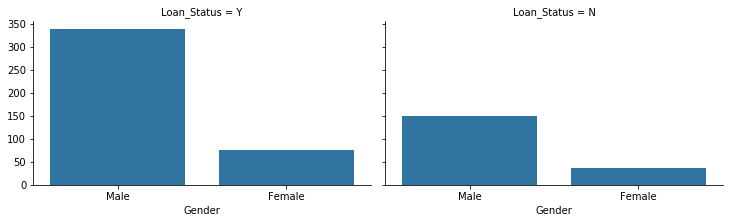

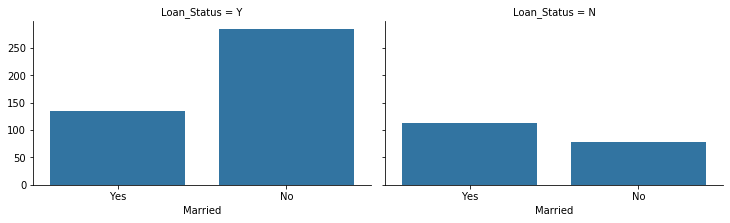

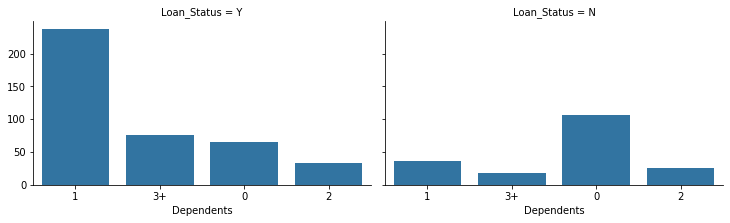

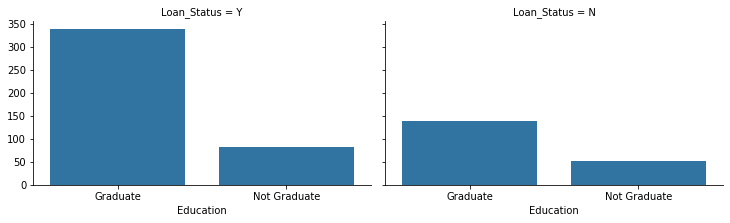

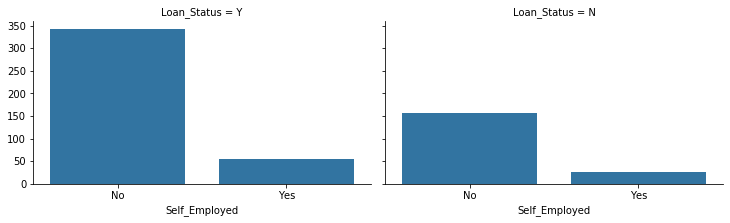

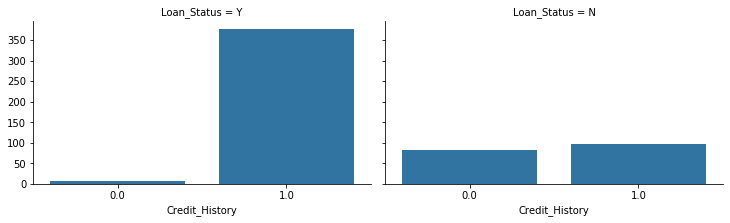

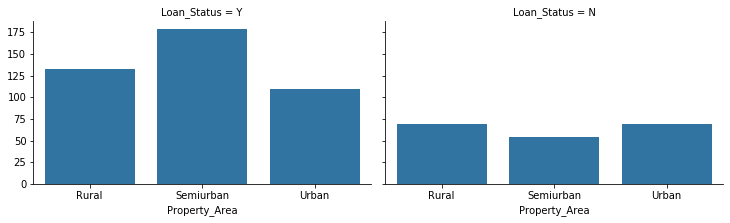

In [15]:
for c in cat_cols[:-1]:
    grid = sns.FacetGrid(df,col='Loan_Status', size=3.2, aspect=1.6)
    grid.map(sns.countplot, c)

### Num cols vs Target variable

In [16]:
num_cols

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

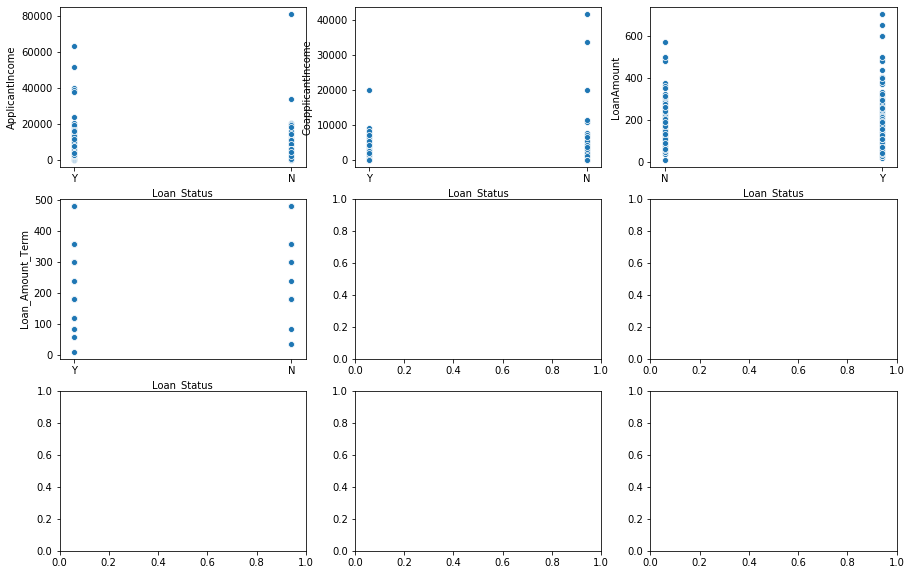

In [17]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))
for n, subplot in zip(num_cols, ax.flatten()):
    sns.scatterplot(x='Loan_Status', y= n, data=df, ax=subplot)
    
    

## Data preprocessing

### Dealing with missing data

In [18]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_Status           0
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
dtype: int64

### Dealing with missing categorical data

In [19]:
categorical_data

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1,Urban,Y
1,Male,Yes,1,Graduate,No,1,Rural,N
2,Male,Yes,0,Graduate,Yes,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,1,Urban,Y
4,Male,No,0,Graduate,No,1,Urban,Y
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1,Rural,Y
610,Male,Yes,3+,Graduate,No,1,Rural,Y
611,Male,Yes,1,Graduate,No,1,Urban,Y
612,Male,Yes,2,Graduate,No,1,Urban,Y


In [20]:
categorical_data.isnull().sum()

Gender            13
Married            3
Dependents        15
Education          0
Self_Employed     32
Credit_History    50
Property_Area      0
Loan_Status        0
dtype: int64

In [21]:
## replacing missing categorical data with more most frequently occuring value
categorical_data = categorical_data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [22]:
categorical_data.isnull().sum()

Gender            0
Married           0
Dependents        0
Education         0
Self_Employed     0
Credit_History    0
Property_Area     0
Loan_Status       0
dtype: int64

In [23]:
categorical_data

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y
...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,1.0,Urban,Y


### Dealing with missing numerical data

In [24]:
numeric_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,NaN,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
609,2900,0.0,71.0,360.0
610,4106,0.0,40.0,180.0
611,8072,240.0,253.0,360.0
612,7583,0.0,187.0,360.0


In [25]:
numeric_data.fillna(method='bfill',inplace=True)

In [26]:
numeric_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,128.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
609,2900,0.0,71.0,360.0
610,4106,0.0,40.0,180.0
611,8072,240.0,253.0,360.0
612,7583,0.0,187.0,360.0


In [27]:
numeric_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
0,5849,0.0,128.0,360.0
1,4583,1508.0,128.0,360.0
2,3000,0.0,66.0,360.0
3,2583,2358.0,120.0,360.0
4,6000,0.0,141.0,360.0
...,...,...,...,...
609,2900,0.0,71.0,360.0
610,4106,0.0,40.0,180.0
611,8072,240.0,253.0,360.0
612,7583,0.0,187.0,360.0


### Encoding target variable

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [29]:
categorical_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y
4,Male,No,0,Graduate,No,1.0,Urban,Y


In [30]:
# transform the target column
target_values = {'Y':1,'N':0}
target = categorical_data['Loan_Status']
categorical_data.drop('Loan_Status', axis=1,inplace=True)
target = target.map(target_values)

### Encoding categorical data

In [31]:
# transform categorical data
for i in categorical_data:
    categorical_data[i] = le.fit_transform(categorical_data[i])

In [32]:
target.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [33]:
categorical_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,1,0,0,0,0,1,2
1,1,1,1,0,0,1,0
2,1,1,0,0,1,1,2
3,1,1,0,1,0,1,2
4,1,0,0,0,0,1,2


## repackaging the dataframe with encoded data

In [34]:
df = pd.concat([categorical_data,numeric_data,target],axis=1)

In [35]:
df

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,1,0,0,0,0,1,2,5849,0.0,128.0,360.0,1
1,1,1,1,0,0,1,0,4583,1508.0,128.0,360.0,0
2,1,1,0,0,1,1,2,3000,0.0,66.0,360.0,1
3,1,1,0,1,0,1,2,2583,2358.0,120.0,360.0,1
4,1,0,0,0,0,1,2,6000,0.0,141.0,360.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1,0,2900,0.0,71.0,360.0,1
610,1,1,3,0,0,1,0,4106,0.0,40.0,180.0,1
611,1,1,1,0,0,1,2,8072,240.0,253.0,360.0,1
612,1,1,2,0,0,1,2,7583,0.0,187.0,360.0,1


## Splitting the data

### Techniques to split the data
- **Random Sampling**: This is a sampling technique in which a subset of a statistical population is taken out, where each member of the population has an equal opportunity of being selected. For example, imagine we have a 1000 dogs and we want to take a sample of 200 dogs. In this process each of the 3000 dogs has an equal opportunity(probability) of being selected in the 200 dogs needed in the sample. *Random sampling is ideal when there is not much information about a population or when the data is diverse and not easily grouped.*

- **Stratified Sampling**: This is a sampling technique that is best used when a statistical population can easily be broken down into distinctive sub-groups. Then samples are taken from each sub-groups based on the ratio of the sub groups size to the total population. Using the dogs example again, imagine now we have four distinctive breed of dogs in the 1000 population broken down into A:450, B:250, C:200 and D:100. To perform the sampling of the 200 dogs needed, 45% of the sample must come from A, 25% from B, 20% from C and lastly 10% must come from D. *Using Stratified Sampling technique ensures that there will be selection from each sub-groups and prevents the chance of omitting one sub-group leading to sampling bias thus making the dog population happy!*


In [36]:
X = pd.concat([categorical_data,numeric_data],axis =1)
y = target

In [37]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [38]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [39]:
from sklearn.model_selection import StratifiedShuffleSplit

In [40]:
sss = StratifiedShuffleSplit(n_splits =1, test_size= 0.2, random_state=42)

### Here we want to test how uniformly the split has happened. If it's too lopsided then something's gone wrong

In [41]:
for train, test in sss.split(X,y):
    X_train, X_test = X.iloc[train], X.iloc[test]
    y_train, y_test = y.iloc[train], y.iloc[test]
print('X_train_shape:',X_train.shape)
print('X_test_shape:',X_test.shape)
print('y_train_shape:',y_train.shape)
print('y_test_shape:',y_test.shape)

# checking ratio of the split
print ('\n ratio of target in y_train:', y_train.value_counts().values/len(y_train))
print ('\n ratio of target in y_test:', y_test.value_counts().values/len(y_test))
print ('\n ratio of target in original:', df['Loan_Status'].value_counts().values/len(df))



X_train_shape: (491, 11)
X_test_shape: (123, 11)
y_train_shape: (491,)
y_test_shape: (123,)

 ratio of target in y_train: [0.68635438 0.31364562]

 ratio of target in y_test: [0.69105691 0.30894309]

 ratio of target in original: [0.68729642 0.31270358]


## Model selection for training

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [43]:
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'SVC': SVC(random_state=42),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1,random_state=42)
}

## Build functions

Here we are going to build 3 types of functions,

   1. Loss functions
   2. train_eval_train
   3. train_eval_cross
   
The reason why we are creating these functions is to improve the models with data refinement. This is because the model evaluation you start with often isn't the most optimised. You need to do feature engineering, refinement etc to help the model perform better. 

### Building loss functions

*https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

To measure the how good the models are at predicting, we will be calculating the following :
   - **Precision**
   - **Recall**
   - **f1**
   - **accuracy**
   
**Precision** - out of all the predicted positive, how many actual positives did the model succeed in identify i.e. True positive/(True positive + false positive)

**Recall** - out of all the actual positives (true positive+false negative), how many did the model succeed in labelling as positive 

**Accuracy** - measures how successfully the model correctly predicted i.e. ratio of (True positive + True negative) of all the predictions

Accuracy = (True positive+ True negative)/(True positive+ True negative+False positive+False negative)

**f1** - It's simple enough to see that accuracy can be influenced by a large number of True negatives which usually does not have a business cost. If the data has large number of negatives and the cost of false positive and false negative is high, it is better to seek a balance between precision and recall. 

This can be achieved by calculating the weighted average of precision and recall known as the F1 score

F1 = 2 * (precision * recall)/(precision + recall)

In [44]:
from sklearn.metrics import precision_score,recall_score,f1_score, log_loss, accuracy_score

In [45]:
def loss(y_true, y_pred, retu=False):
    pre = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    
    if retu:
        return pre, rec, f1, loss, acc
    else:
        print('  pre: %.3f\n  rec: %.3f\n  f1: %.3f\n  loss: %.3f\n  acc: %.3f' % (pre, rec, f1, loss, acc))
    

### Training the models

In [46]:
## build a train_eval_train function

def train_eval_train(models, X, y):
    for name, model in models.items():
        print(name,':')
        model.fit(X,y)
        loss(y,model.predict(X))
        print('-'*30)

train_eval_train(models,X_train, y_train)

LogisticRegression :
  pre: 0.782
  rec: 0.979
  f1: 0.870
  loss: 6.964
  acc: 0.798
------------------------------
KNeighborsClassifier :
  pre: 0.742
  rec: 0.896
  f1: 0.812
  loss: 9.848
  acc: 0.715
------------------------------
SVC :
  pre: 0.689
  rec: 1.000
  f1: 0.816
  loss: 10.692
  acc: 0.690
------------------------------
DecisionTreeClassifier :
  pre: 0.781
  rec: 0.982
  f1: 0.870
  loss: 6.964
  acc: 0.798
------------------------------


### Evaluating the models using validation data

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-and-model-selection
https://medium.com/@xzz201920/stratifiedkfold-v-s-kfold-v-s-stratifiedshufflesplit-ffcae5bfdf
https://datascience.stackexchange.com/questions/13960/how-to-choose-a-classifier-after-cross-validation

### Using cross val score

In [47]:
from sklearn.model_selection import cross_val_score

In [48]:
def cross_val_train(models,X,y):
    for name,model in models.items():
        print(name,':')
        scores = cross_val_score(model,X,y,cv=5)
        print(scores)
        print("-"*30)
        
    

In [49]:
cross_val_old=cross_val_train(models,X_train,y_train)

LogisticRegression :
[0.7979798  0.80612245 0.81632653 0.78571429 0.7755102 ]
------------------------------
KNeighborsClassifier :
[0.67676768 0.57142857 0.52040816 0.56122449 0.63265306]
------------------------------
SVC :
[0.68686869 0.69387755 0.68367347 0.68367347 0.67346939]
------------------------------
DecisionTreeClassifier :
[0.7979798  0.80612245 0.81632653 0.78571429 0.78571429]
------------------------------


### Using StratifiedKFold

Some classification problems can exhibit a large imbalance in the distribution of the target classes: for instance there could be several times more negative samples than positive samples. In such cases it is recommended to use stratified sampling as implemented in StratifiedKFold and StratifiedShuffleSplit to ensure that relative class frequencies is approximately preserved in each train and validation fold.

In [50]:
from sklearn.model_selection import StratifiedKFold 

In [51]:
skf = StratifiedKFold(n_splits=10, random_state=42, shuffle = True)

In [52]:
# creating a validation function

In [53]:
def train_eval_cross(models, X, y, folds):
    # because iloc does not work on numpy arrays, we will turn X and y into dataframes
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    idx = ['pre','rec','f1','loss','acc']
    
    for name,model in models.items():
        ls = []
        print(name,':')
        
        for train,test in folds.split(X,y):
            model.fit(X.iloc[train], y.iloc[train])
            y_pred = model.predict(X.iloc[test])
            ls.append(loss(y.iloc[test],y_pred, retu=True))
        print(pd.DataFrame(np.array(ls).mean(axis=0), index=idx)[0]) # '0' because we dont want to show the name of the column
        print ("-"*30)

In [54]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :
pre     0.781539
rec     0.976292
f1      0.867440
loss    7.106681
acc     0.794245
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
pre      0.680219
rec      0.827986
f1       0.745964
loss    13.299757
acc      0.614939
Name: 0, dtype: float64
------------------------------
SVC :
pre      0.685730
rec      0.997059
f1       0.812542
loss    10.903226
acc      0.684327
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
pre     0.782389
rec     0.982175
f1      0.870395
loss    6.965706
acc     0.798327
Name: 0, dtype: float64
------------------------------


## Improving the model using feature engineering

### Feature engineering

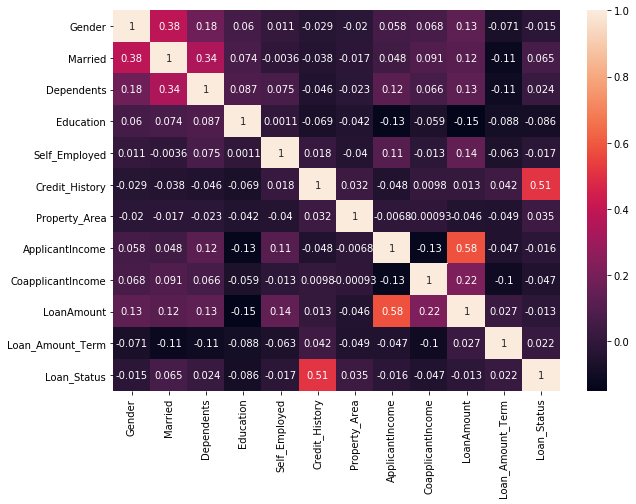

In [55]:
data_corr = pd.concat([X_train,y_train],axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True)

**Observations** 

 - There is a strong correlation between loan and applicant income 
 - Looking at the target variable (loan_status) it's clear that credit history is the best predictor, following by being married , having dependants and property area

### Combining variables

In [56]:
data_corr.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Loan_Status'],
      dtype='object')

In [57]:
X_train['new_col1'] = X_train['CoapplicantIncome']/X_train['ApplicantIncome']
X_train['new_col2'] = X_train['LoanAmount']*X_train['Loan_Amount_Term']

In [58]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,new_col1,new_col2
154,1,0,0,0,0,1,2,3254,0.0,50.0,360.0,0.000000,18000.0
239,1,1,1,0,0,1,1,3315,0.0,96.0,360.0,0.000000,34560.0
448,1,1,2,0,0,0,0,3340,1710.0,150.0,360.0,0.511976,54000.0
471,1,1,1,1,0,0,0,2653,1500.0,113.0,180.0,0.565398,20340.0
273,1,1,0,0,0,1,1,2620,2223.0,150.0,360.0,0.848473,54000.0


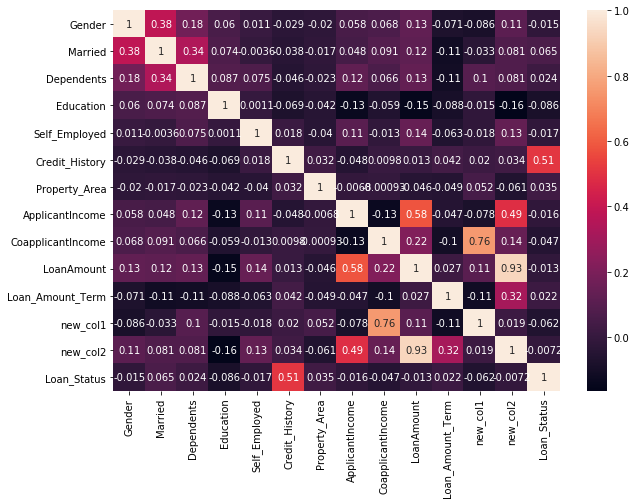

In [59]:
data_corr = pd.concat([X_train,y_train],axis=1)
corr = data_corr.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True)

In [60]:
X_train.drop(['ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'],axis=1,inplace= True)

In [61]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,new_col1,new_col2
154,1,0,0,0,0,1,2,0.000000,18000.0
239,1,1,1,0,0,1,1,0.000000,34560.0
448,1,1,2,0,0,0,0,0.511976,54000.0
471,1,1,1,1,0,0,0,0.565398,20340.0
273,1,1,0,0,0,1,1,0.848473,54000.0
...,...,...,...,...,...,...,...,...,...
222,1,0,0,0,0,1,1,0.939414,51840.0
349,1,1,0,0,0,1,0,2.380952,67320.0
26,1,1,0,0,0,1,1,0.804930,43920.0
96,0,1,0,0,0,1,1,0.926731,49320.0


### running evaluation again

In [62]:
train_eval_cross(models, X_train, y_train, skf)

LogisticRegression :
pre      0.686367
rec      1.000000
f1       0.813982
loss    10.832739
acc      0.686367
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
pre      0.676204
rec      0.798039
f1       0.730350
loss    13.858013
acc      0.598776
Name: 0, dtype: float64
------------------------------
SVC :
pre      0.686367
rec      1.000000
f1       0.813982
loss    10.832739
acc      0.686367
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
pre     0.782389
rec     0.982175
f1      0.870395
loss    6.965706
acc     0.798327
Name: 0, dtype: float64
------------------------------


In [63]:
cross_val_train(models,X_train,y_train)

LogisticRegression :
[0.68686869 0.69387755 0.68367347 0.68367347 0.78571429]
------------------------------
KNeighborsClassifier :
[0.62626263 0.56122449 0.65306122 0.66326531 0.68367347]
------------------------------
SVC :
[0.68686869 0.69387755 0.68367347 0.68367347 0.68367347]
------------------------------
DecisionTreeClassifier :
[0.7979798  0.80612245 0.81632653 0.78571429 0.78571429]
------------------------------


In [65]:
cross_val_old

## Feature selection

First lets find variability in each variable. Variable with highest variance needs looking into

In [67]:
for i in range(X_train.shape[1]):
    print(X_train.iloc[:,i].value_counts())
    print('-'*40)

1    404
0     87
Name: Gender, dtype: int64
----------------------------------------
1    322
0    169
Name: Married, dtype: int64
----------------------------------------
0    284
1     85
2     83
3     39
Name: Dependents, dtype: int64
----------------------------------------
0    380
1    111
Name: Education, dtype: int64
----------------------------------------
0    425
1     66
Name: Self_Employed, dtype: int64
----------------------------------------
1    424
0     67
Name: Credit_History, dtype: int64
----------------------------------------
1    184
2    162
0    145
Name: Property_Area, dtype: int64
----------------------------------------
0.000000    223
0.735294      2
0.912892      1
0.612928      1
0.255325      1
           ... 
0.908571      1
0.564642      1
0.731694      1
0.700444      1
0.735000      1
Name: new_col1, Length: 268, dtype: int64
----------------------------------------
43200.0    15
39600.0    14
57600.0    12
36000.0    10
46080.0     9
           .

In [68]:
# Looking at the data above new_col2 has the most varied values

In [69]:
# Let's examine this distribution in a frequency distribution chart

Text(0.5, 1.0, 'new_col_after_log')

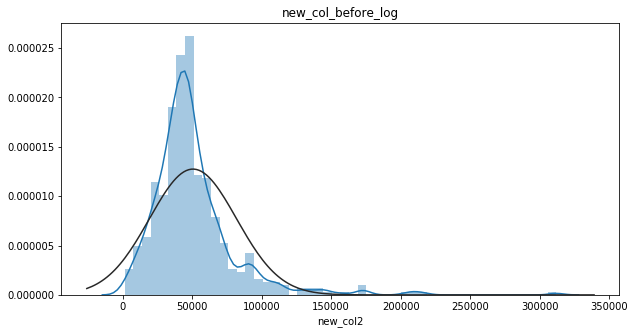

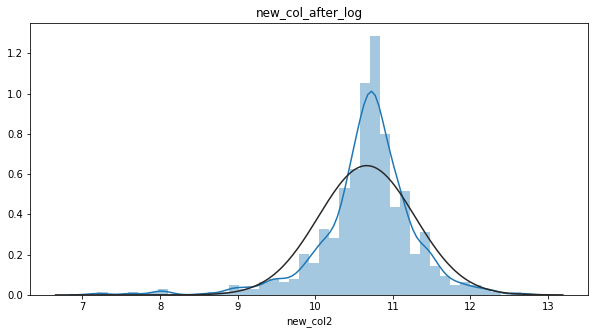

In [74]:
from scipy.stats import norm
fig,ax = plt.subplots(figsize=(10,5))
sns.distplot(X_train['new_col2'],fit=norm)
plt.title('new_col_before_log')

# It's clear to see that the new_col2 has right skewdness. To resolve this we apply logorithmic scale so that the data
# is normally distributed

X_train['new_col2'] = np.log(X_train['new_col2'])


fig,ax = plt.subplots(figsize=(10,5))
sns.distplot(X_train['new_col2'],fit=norm)
plt.title('new_col_after_log')

In [77]:
# Evaluating the models again

train_eval_cross(models,X_train,y_train,skf)
cross_val_train(models,X_train,y_train)

LogisticRegression :
pre     0.782389
rec     0.982175
f1      0.870395
loss    6.965706
acc     0.798327
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
pre     0.747040
rec     0.926025
f1      0.825995
loss    9.283351
acc     0.731224
Name: 0, dtype: float64
------------------------------
SVC :
pre      0.689320
rec      1.000000
f1       0.816005
loss    10.691761
acc      0.690449
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
pre     0.782389
rec     0.982175
f1      0.870395
loss    6.965706
acc     0.798327
Name: 0, dtype: float64
------------------------------
LogisticRegression :
[0.7979798  0.81632653 0.81632653 0.78571429 0.78571429]
------------------------------
KNeighborsClassifier :
[0.70707071 0.80612245 0.71428571 0.74489796 0.73469388]
------------------------------
SVC :
[0.68686869 0.69387755 0.68367347 0.68367347 0.68367347]
------------------------------
DecisionTreeClassifier :
[0.7979798  0.8061224

In [78]:
# looking at new_col1, most of the values are '0'. It's worth changing all others values to '1'

In [79]:
X_train['new_col1'] = [x if x==0 else 1 for x in X_train['new_col1']]

In [81]:
X_train['new_col1'].value_counts()

1.0    268
0.0    223
Name: new_col1, dtype: int64

In [82]:
train_eval_cross(models,X_train,y_train,skf)
cross_val_train(models,X_train,y_train)

LogisticRegression :
pre     0.782389
rec     0.982175
f1      0.870395
loss    6.965706
acc     0.798327
Name: 0, dtype: float64
------------------------------
KNeighborsClassifier :
pre     0.742331
rec     0.931907
f1      0.825472
loss    9.356663
acc     0.729102
Name: 0, dtype: float64
------------------------------
SVC :
pre     0.708931
rec     0.990998
f1      0.826051
loss    9.916378
acc     0.712898
Name: 0, dtype: float64
------------------------------
DecisionTreeClassifier :
pre     0.782389
rec     0.982175
f1      0.870395
loss    6.965706
acc     0.798327
Name: 0, dtype: float64
------------------------------
LogisticRegression :
[0.7979798  0.80612245 0.81632653 0.78571429 0.78571429]
------------------------------
KNeighborsClassifier :
[0.73737374 0.75510204 0.68367347 0.7755102  0.7244898 ]
------------------------------
SVC :
[0.68686869 0.69387755 0.68367347 0.68367347 0.68367347]
------------------------------
DecisionTreeClassifier :
[0.7979798  0.80612245 0.8